# plotting bayescan results

### plotting imports

In [1]:
import numpy as np
import pandas as pd
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches

In [2]:
%run CONFIG.ipynb

In [3]:
CWD

'C:\\Users\\IPSEG\\Desktop\\Waples\\chum_populations'

### plot formatting

In [4]:
sns.set(font_scale=1.2)
sns.set_style("white")
%matplotlib inline

### plotting of outliers

In [5]:
def plot_bayescan(baye_fst, title, q_threshold = .05):
    plt.scatter(-np.log10(baye_fst['qval']), baye_fst['fst'])
    plt.axvline(x=-np.log10(q_threshold), c= 'black',  ls = '--')
    plt.xlabel('-log10(q)',fontsize = 24); plt.ylabel("Fst",fontsize = 24)
    plt.annotate('{} outliers at\nqval <= {}'.format(sum(baye_fst['qval'] < q_threshold), q_threshold),  
             xycoords='axes fraction', xy = (.1, .7), fontsize = 24)
    plt.title(title)
    sns.despine()
    plt.show()

#### Load data

In [6]:
def load_baye_fst(filename):
    baye_fst = pd.read_csv(filename, sep = " ", skiprows=1, header = None, skipinitialspace=True)
    baye_fst.columns = ['BSname','prob','log10(PO)','qval','alpha','fst', 'junk']
    return(baye_fst)

Here, I am trying to use relative file paths that will work across Ubuntu and Windows

In [7]:
group_1_fst_file = os.path.join(CWD, 'results', 'batch_4', 'pop_analysis', 'bayescan', 'BS_group_1.baye_fst.txt')
group_2_fst_file = os.path.join(CWD, 'results', 'batch_4', 'pop_analysis', 'bayescan', 'BS_group_2.baye_fst.txt')
group_3_fst_file = os.path.join(CWD, 'results', 'batch_4', 'pop_analysis', 'bayescan', 'BS_group_3.baye_fst.txt')
group_4_fst_file = os.path.join(CWD, 'results', 'batch_4', 'pop_analysis', 'bayescan', 'BS_group_4.baye_fst.txt')
group_5_fst_file = os.path.join(CWD, 'results', 'batch_4', 'pop_analysis', 'bayescan', 'BS_group_5.baye_fst.txt')
group_6_fst_file = os.path.join(CWD, 'results', 'batch_4', 'pop_analysis', 'bayescan', 'BS_group_6.baye_fst.txt')
group_7_fst_file = os.path.join(CWD, 'results', 'batch_4', 'pop_analysis', 'bayescan', 'BS_group_7.baye_fst.txt')

In [8]:
BS_1 = load_baye_fst(group_1_fst_file)
BS_2 = load_baye_fst(group_2_fst_file)
BS_3 = load_baye_fst(group_3_fst_file)
BS_4 = load_baye_fst(group_4_fst_file)
BS_5 = load_baye_fst(group_5_fst_file)
BS_6 = load_baye_fst(group_6_fst_file)
BS_7 = load_baye_fst(group_7_fst_file)

BS_4.head()

BSname      prob  log10(PO)      qval     alpha       fst  junk
0       1  0.082708   -1.04496  0.899464 -0.014931  0.016465   NaN
1       2  0.085809   -1.02750  0.892910 -0.007593  0.016570   NaN
2       3  0.083208   -1.04210  0.898870 -0.027751  0.016156   NaN
3       4  0.084008   -1.03760  0.897430 -0.026646  0.016208   NaN
4       5  0.087709   -1.01710  0.884740  0.010392  0.017013   NaN

### Plot

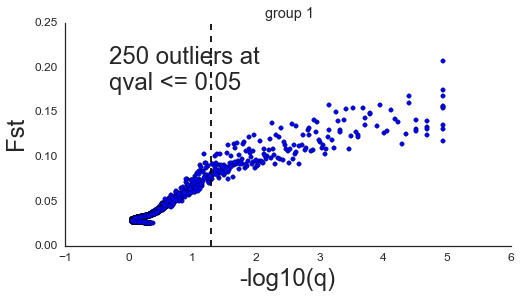

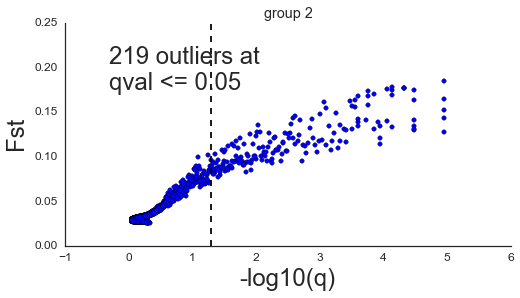

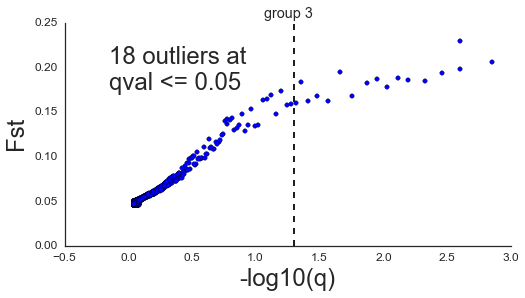

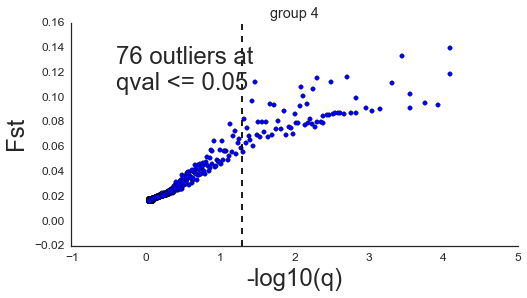

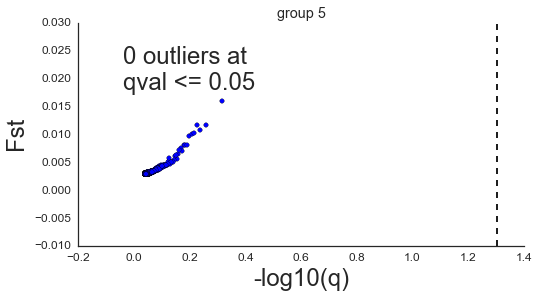

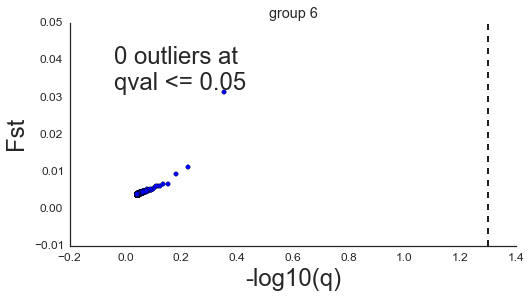

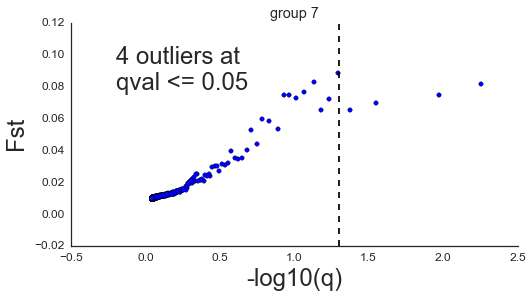

In [9]:
figsize(8,4)
plot_bayescan(BS_1, 'group 1', .05)
plot_bayescan(BS_2, 'group 2', .05)
plot_bayescan(BS_3, 'group 3',.05)
plot_bayescan(BS_4, 'group 4',.05)
plot_bayescan(BS_5, 'group 5',.05)
plot_bayescan(BS_6, 'group 6',.05)
plot_bayescan(BS_7, 'group 7',.05)

### Define sets of outliers

In [10]:
### This need to be changed to export Stacks_SNP IDs
def get_outliers(baye_fst, q_threshold = .05):
    outliers = baye_fst[baye_fst['qval'] <= q_threshold]
    return(set(outliers['BSname']))

In [11]:
outliers_1 = get_outliers(BS_1, .05)
outliers_2 = get_outliers(BS_2, .05)
outliers_3 = get_outliers(BS_3, .05)
outliers_4 = get_outliers(BS_4, .05)
outliers_5 = get_outliers(BS_5, .05)
outliers_6 = get_outliers(BS_6, .05)
outliers_7 = get_outliers(BS_7, .05)

In [12]:
across_life_history_outliers = outliers_3.union(outliers_4.union(outliers_5))
within_life_history_outliers = outliers_6.union(outliers_7)
life_history_outliers = across_life_history_outliers.difference(within_life_history_outliers)

In [13]:
len(life_history_outliers)

90

# Combine with mapped data

### get the Stacks_SNP id for each locus

In [14]:
# in the output from plink, column 2 is what we want
stacks_SNPs = pd.read_csv(os.path.join('results', 'batch_4', 'pop_analysis', 'bayescan', 'non_paralogs.map'),                        
            header = None, sep = '\t')
stacks_SNPs.columns =  ['ignore1', 'stacks_SNP', 'ignore2', 'ignore3']
stacks_SNPs['BSname'] = stacks_SNPs.index + 1
stacks_SNPs.head()

ignore1 stacks_SNP  ignore2  ignore3  BSname
0        0     1013_6        0        6       1
1        0     2062_6        0        6       2
2        0     2574_6        0        6       3
3        0     2741_6        0        6       4
4        0     4096_6        0        6       5

## Load linkage map

In [15]:
lmap = pd.read_csv(os.path.join(CWD, 'linkage_map', 'LEPmap', 'with_paralogs', 'final', 'PS_chum_map_2015.txt'),sep = "\t")
lmap.head()

contig resolved_locus  stacks_CatID stacks_SNP  LEPname  LEP_LG  cM_OLD  \
0   c4311           4311         28282   28282_88     4584       1       0   
1   c4311           4311         28282   28282_91     4584       1       0   
2  c56875          56875         39970   39970_17     7377       1       0   
3  c56875          56875         39970   39970_33     7377       1       0   
4  c56875          56875         39970   39970_49     7377       1       0   

   paper1_LG  cM  
0          1   0  
1          1   0  
2          1   0  
3          1   0  
4          1   0

### merge with Bayescan results

In [16]:
mapped_bayescan = pd.merge(BS_2, stacks_SNPs)
mapped_bayescan = mapped_bayescan[['stacks_SNP', 'BSname', 'fst', 'log10(PO)', 'qval', 'alpha']]

In [17]:
map_pop_bayescan = pd.merge(lmap, mapped_bayescan, on="stacks_SNP")
map_pop_bayescan.head()

contig resolved_locus  stacks_CatID stacks_SNP  LEPname  LEP_LG  cM_OLD  \
0   c4311           4311         28282   28282_88     4584       1       0   
1  c56875          56875         39970   39970_60     7377       1       0   
2  c54045          54045         37579   37579_17     6722       1       0   
3   c2167           2167         10293    10293_9     1923       1       0   
4  c69918          69918         50820    50820_7    10017       1       0   

   paper1_LG  cM  BSname       fst  log10(PO)     qval     alpha  
0          1   0    6440  0.028428    -1.0935  0.87532 -0.008090  
1          1   0    6348  0.027983    -1.1233  0.88464 -0.019498  
2          1   0    6197  0.028735    -1.1240  0.88481  0.004748  
3          1   0    6162  0.028102    -1.0898  0.87376 -0.016256  
4          1   0    6154  0.027949    -1.1287  0.88562 -0.019918

## load Fst from PLINK

In [18]:
plink_fst = pd.read_csv(os.path.join('data', 'batch_4', 'pop_genotypes', 'non_paralogs.fst'), sep = "\t")
plink_fst.head()

CHR     SNP  POS  NMISS       FST
0    0  1013_6    6    168  0.015589
1    0  2062_6    6    171 -0.002161
2    0  2574_6    6    169  0.017541
3    0  2741_6    6    166 -0.005708
4    0  4096_6    6    169  0.010227

#### merge with Plink (Wier) FST

clarify the two different fst columns

In [19]:

map_pop_bayescan=pd.merge(map_pop_bayescan, plink_fst, left_on='stacks_SNP', right_on ='SNP')
map_pop_bayescan.rename(columns={'fst': 'Fst_bayescan', 'FST': 'Fst_plink'}, inplace=True)
map_pop_bayescan = map_pop_bayescan.sort(['paper1_LG', 'cM'])
map_pop_bayescan['manhattan_order'] = range(1, len(map_pop_bayescan)+1)
map_pop_bayescan['mlog10(qval)'] = -np.log10(map_pop_bayescan['qval'])
map_pop_bayescan.head()

contig resolved_locus  stacks_CatID stacks_SNP  LEPname  LEP_LG  cM_OLD  \
0   c4311           4311         28282   28282_88     4584       1       0   
1  c56875          56875         39970   39970_60     7377       1       0   
2  c54045          54045         37579   37579_17     6722       1       0   
3   c2167           2167         10293    10293_9     1923       1       0   
4  c69918          69918         50820    50820_7    10017       1       0   

   paper1_LG  cM  BSname      ...       log10(PO)     qval     alpha  CHR  \
0          1   0    6440      ...         -1.0935  0.87532 -0.008090    1   
1          1   0    6348      ...         -1.1233  0.88464 -0.019498    1   
2          1   0    6197      ...         -1.1240  0.88481  0.004748    1   
3          1   0    6162      ...         -1.0898  0.87376 -0.016256    1   
4          1   0    6154      ...         -1.1287  0.88562 -0.019918    1   

        SNP POS  NMISS  Fst_plink  manhattan_order  mlog10(qval)  
0  28282_88  88    156   0.013742                1      0.057833  
1  39970_60  60    152   0.016345                2      0.053233  
2  37579_17  17    164   0.028103                3      0.053150  
3   10293_9   9    162   0.014312                4      0.058608  
4   50820_7   7    169   0.015249                5      0.052753  

[5 rows x 21 columns]

In [20]:
## Add space between linkage groups - easier to visualize

In [21]:
cumpos = pd.DataFrame(map_pop_bayescan.groupby('paper1_LG')['cM'].max().cumsum())
cumpos.index = cumpos.index+1
cumpos.ix[1]=0
cumpos = cumpos.sort()
cumpos['cM'] = cumpos['cM'] + np.arange(0,750, 20)

In [22]:
cM_positions = pd.merge(map_pop_bayescan, cumpos, right_index=True, left_on = 'paper1_LG')
cM_positions['overall_cM'] = cM_positions['cM_y'] + cM_positions['cM_x']
cM_positions.head()

contig resolved_locus  stacks_CatID stacks_SNP  LEPname  LEP_LG  cM_OLD  \
0   c4311           4311         28282   28282_88     4584       1       0   
1  c56875          56875         39970   39970_60     7377       1       0   
2  c54045          54045         37579   37579_17     6722       1       0   
3   c2167           2167         10293    10293_9     1923       1       0   
4  c69918          69918         50820    50820_7    10017       1       0   

   paper1_LG  cM_x  BSname     ...         alpha  CHR       SNP  POS  NMISS  \
0          1     0    6440     ...     -0.008090    1  28282_88   88    156   
1          1     0    6348     ...     -0.019498    1  39970_60   60    152   
2          1     0    6197     ...      0.004748    1  37579_17   17    164   
3          1     0    6162     ...     -0.016256    1   10293_9    9    162   
4          1     0    6154     ...     -0.019918    1   50820_7    7    169   

  Fst_plink  manhattan_order  mlog10(qval)  cM_y  overall_cM  
0  0.013742                1      0.057833     0           0  
1  0.016345                2      0.053233     0           0  
2  0.028103                3      0.053150     0           0  
3  0.014312                4      0.058608     0           0  
4  0.015249                5      0.052753     0           0  

[5 rows x 23 columns]

## Combine with LFMM statistics

In [23]:
mapped_lfmm = pd.read_csv(os.path.join('results','batch_4','LFMM', 'mapped_lfmm.txt'), sep = '\t')
mapped_lfmm.head()

contig  resolved_locus  stacks_CatID stacks_SNP_x  LEPname  LEP_LG  cM_OLD  \
0   c4311            4311         28282     28282_88     4584       1       0   
1  c56875           56875         39970     39970_60     7377       1       0   
2  c54045           54045         37579     37579_17     6722       1       0   
3   c2167            2167         10293      10293_9     1923       1       0   
4  c69918           69918         50820      50820_7    10017       1       0   

   paper1_LG  cM  locnum       ...        plinkLG  stacksID  junk1 junk2  CHR  \
0          1   0    6440       ...              1  28282_88      0    88    1   
1          1   0    6348       ...              1  39970_60      0    60    1   
2          1   0    6197       ...              1  37579_17      0    17    1   
3          1   0    6162       ...              1   10293_9      0     9    1   
4          1   0    6154       ...              1   50820_7      0     7    1   

  stacks_SNP_y  POS  NMISS       FST manhattan_order  
0     28282_88   88    156  0.013742               1  
1     39970_60   60    152  0.016345               2  
2     37579_17   17    164  0.028103               3  
3      10293_9    9    162  0.014312               4  
4      50820_7    7    169  0.015249               5  

[5 rows x 24 columns]

In [24]:
cM_positions.head()

contig resolved_locus  stacks_CatID stacks_SNP  LEPname  LEP_LG  cM_OLD  \
0   c4311           4311         28282   28282_88     4584       1       0   
1  c56875          56875         39970   39970_60     7377       1       0   
2  c54045          54045         37579   37579_17     6722       1       0   
3   c2167           2167         10293    10293_9     1923       1       0   
4  c69918          69918         50820    50820_7    10017       1       0   

   paper1_LG  cM_x  BSname     ...         alpha  CHR       SNP  POS  NMISS  \
0          1     0    6440     ...     -0.008090    1  28282_88   88    156   
1          1     0    6348     ...     -0.019498    1  39970_60   60    152   
2          1     0    6197     ...      0.004748    1  37579_17   17    164   
3          1     0    6162     ...     -0.016256    1   10293_9    9    162   
4          1     0    6154     ...     -0.019918    1   50820_7    7    169   

  Fst_plink  manhattan_order  mlog10(qval)  cM_y  overall_cM  
0  0.013742                1      0.057833     0           0  
1  0.016345                2      0.053233     0           0  
2  0.028103                3      0.053150     0           0  
3  0.014312                4      0.058608     0           0  
4  0.015249                5      0.052753     0           0  

[5 rows x 23 columns]

In [25]:
cM_positions2 = pd.merge(cM_positions, mapped_lfmm, left_on=['BSname', 'paper1_LG'], right_on = ['locnum', 'paper1_LG'])

In [26]:
cM_positions2.head()

contig_x resolved_locus_x  stacks_CatID_x stacks_SNP  LEPname_x  LEP_LG_x  \
0    c4311             4311           28282   28282_88       4584         1   
1   c56875            56875           39970   39970_60       7377         1   
2   c54045            54045           37579   37579_17       6722         1   
3    c2167             2167           10293    10293_9       1923         1   
4   c69918            69918           50820    50820_7      10017         1   

   cM_OLD_x  paper1_LG  cM_x  BSname        ...          plinkLG  stacksID  \
0         0          1     0    6440        ...                1  28282_88   
1         0          1     0    6348        ...                1  39970_60   
2         0          1     0    6197        ...                1  37579_17   
3         0          1     0    6162        ...                1   10293_9   
4         0          1     0    6154        ...                1   50820_7   

   junk1  junk2  CHR_y stacks_SNP_y  POS_y  NMISS_y       FST  \
0      0     88      1     28282_88     88      156  0.013742   
1      0     60      1     39970_60     60      152  0.016345   
2      0     17      1     37579_17     17      164  0.028103   
3      0      9      1      10293_9      9      162  0.014312   
4      0      7      1      50820_7      7      169  0.015249   

   manhattan_order_y  
0                  1  
1                  2  
2                  3  
3                  4  
4                  5  

[5 rows x 46 columns]

## Other to nclude in sliding window analyses 
    - HWE deviations - could re-include excluded loci
    - Inbreeding 
    - heterozygosity
    - depth of sequencing coverage?
    - allele frequencies
    - transmission disequilibrium in families

## Rolling averages

In [27]:
def get_weights(window_size, center, positions, power = 2):
    # wei = .001+window_size-(np.abs(center - positions))
    # could also try:

    wei = np.exp(-(center - positions)**2)
    #wei = 1./(1 + np.abs(center - positions))**power
    return(wei)

In [28]:
def roll_along(data, stat, positions, window_size =5, minsize= 2):
    rolling_stat = []
    rolling_size = []
    for xx in positions:
        subset = data[data['overall_cM'] >= xx - window_size/2. ]
        subset = subset[subset['overall_cM'] <= xx + window_size/2.]
        if len(subset) < minsize:
            val = np.NaN
        else:
            val = np.average(subset[stat], 
                             weights = get_weights(window_size = window_size, center = xx, positions = subset['overall_cM']))
        rolling_stat.append(val)
        rolling_size.append(len(subset))
    to_return = pd.DataFrame({stat+'_roll':rolling_stat, 'n':rolling_size, 'pos':positions})
    to_return = to_return[['pos', 'n', stat+'_roll']]
    return(to_return)

In [29]:
def rolling_boostrap(data, stat, positions, window_size = 5, minsize= 2, reps = 100):
    rolling_upper95 = []
    rolling_size = []
    for xx in positions:
        subset = data[data['overall_cM'] >= xx - window_size/2.]
        subset = subset[subset['overall_cM'] <= xx + window_size/2.]
        if len(subset) < minsize:
            val = np.NaN
        else:
            val = np.percentile([np.average(np.random.choice(data[stat].values, size = len(subset), replace = True), 
                                            weights = get_weights(window_size = window_size, center = xx, positions = subset['overall_cM'].values))
             for yy in range(reps)], 95)
            
        rolling_upper95.append(val)
        rolling_size.append(len(subset))
    to_return = pd.DataFrame({stat+'_bootstrap95':rolling_upper95, 'n':rolling_size, 'pos':positions})
    to_return = to_return[['pos', 'n', stat+'_bootstrap95']]
    return(to_return)

### cM positions

In [30]:
max_cM = max(cM_positions2['overall_cM'])
cMs = np.arange(1, max_cM+1, 1.)

In [34]:
rolling = roll_along(data = cM_positions2, stat = 'Fst_bayescan', positions = cMs)

In [33]:
rolling.head()

pos   n  Fst_bayescan_roll
0    1  56           0.032851
1    2  57           0.034767
2    3  25           0.039290
3    4  22           0.032437
4    5  26           0.032284

#### Rolling averages

In [42]:
winsize = 10

rolling = roll_along(data = cM_positions2, stat = 'mlog10val', positions = cMs, window_size= winsize)
rolling = pd.merge(rolling, roll_along(data = cM_positions2, stat = 'mlog10(qval)', positions = cMs, window_size= winsize)  )
rolling = pd.merge(rolling, roll_along(data = cM_positions2, stat = 'Fst_bayescan', positions = cMs, window_size= winsize))
rolling = pd.merge(rolling, roll_along(data = cM_positions2, stat = 'Fst_plink', positions = cMs, window_size= winsize))
rolling = pd.merge(rolling, roll_along(data = cM_positions2, stat = 'alpha', positions = cMs, window_size= winsize))

In [43]:
rolling.head()

pos   n  mlog10val_roll  mlog10(qval)_roll  Fst_bayescan_roll  \
0    1  68        0.556586                inf           0.032851   
1    2  72        0.791396                inf           0.034764   
2    3  77        0.644772                inf           0.039291   
3    4  77        0.469051                inf           0.032434   
4    5  80        0.443204                inf           0.032284   

   Fst_plink_roll  alpha_roll  
0        0.037473    0.067739  
1        0.041182    0.109351  
2        0.058598    0.200057  
3        0.040024    0.070240  
4        0.038323    0.065930

#### Rolling bootstrap 95% upper bounds

In [37]:
rolling = pd.merge(rolling, rolling_boostrap(data = cM_positions2, stat = 'mlog10val', positions = cMs, window_size= winsize)  )
rolling = pd.merge(rolling, rolling_boostrap(data = cM_positions2, stat = 'mlog10(qval)', positions = cMs, window_size= winsize)  )
rolling = pd.merge(rolling, rolling_boostrap(data = cM_positions2, stat = 'Fst_bayescan', positions = cMs, window_size= winsize))
rolling = pd.merge(rolling, rolling_boostrap(data = cM_positions2, stat = 'Fst_plink', positions = cMs, window_size= winsize))
rolling = pd.merge(rolling, rolling_boostrap(data = cM_positions2, stat = 'alpha', positions = cMs, window_size= winsize))

In [38]:
rolling.head()

pos   n  mlog10val_roll  mlog10(qval)_roll  Fst_bayescan_roll  \
0    1  56        0.556587                inf           0.032851   
1    2  57        0.791512                inf           0.034767   
2    3  25        0.645005           0.365574           0.039290   
3    4  22        0.469124           0.172672           0.032437   
4    5  26        0.443183           0.143349           0.032284   

   Fst_plink_roll  alpha_roll  mlog10val_bootstrap95  \
0        0.037473    0.067739               0.593194   
1        0.041182    0.109389               0.780304   
2        0.058613    0.200059               0.728310   
3        0.040047    0.070302               0.723097   
4        0.038323    0.065932               0.662708   

   mlog10(qval)_bootstrap95  Fst_bayescan_bootstrap95  Fst_plink_bootstrap95  \
0                       inf                  0.032576               0.035040   
1                  0.284555                  0.034257               0.046362   
2                  0.451157                  0.040206               0.050184   
3                  0.313026                  0.035811               0.037521   
4                  0.373875                  0.036750               0.041014   

   alpha_bootstrap95  
0           0.076745  
1           0.084745  
2           0.125258  
3           0.099604  
4           0.117394

# Manhattan plot

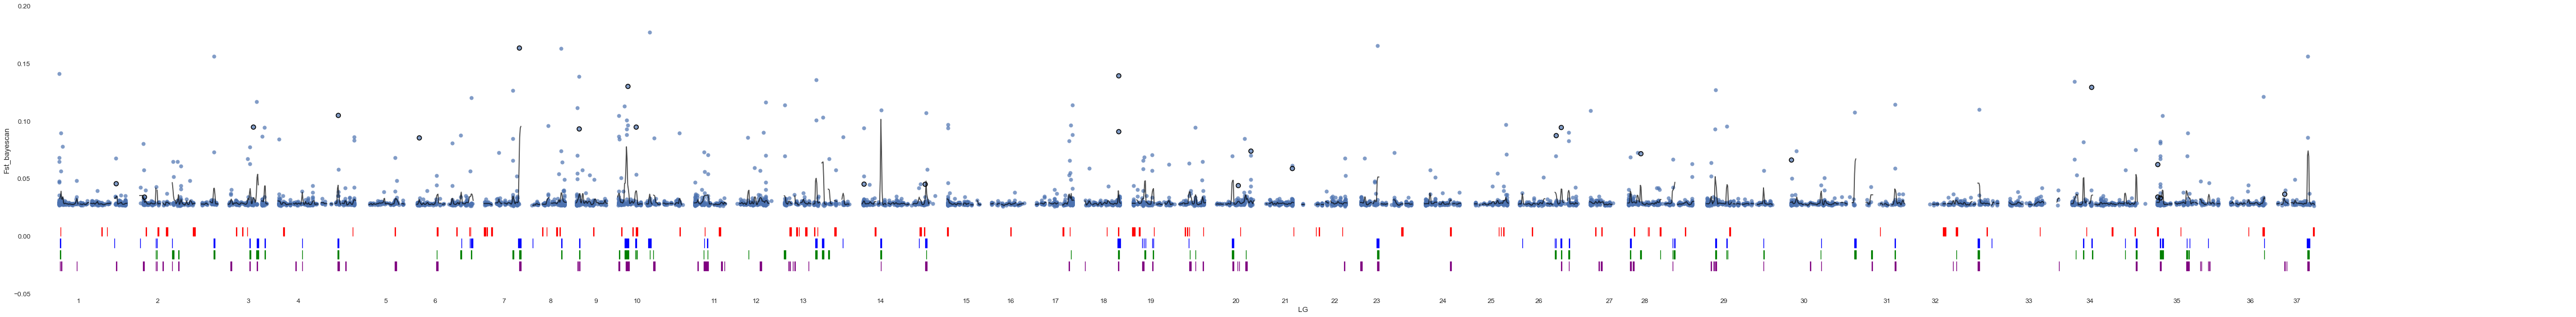

In [41]:
# Manhattan plot
stat = 'Fst_bayescan'
g = sns.lmplot(data = cM_positions2, x = 'overall_cM', y = stat,  fit_reg=False, sharex=False,
           legend= False, size = 8, aspect = 8, truncate = True, scatter_kws={'s':50, 'alpha':.7}, palette="Set2", 
              #hue = 'paper1_LG',
              )
g.set(xlim=-40, ylim = -.05)
g.set(xticks=cumpos['cM']+30, xticklabels = np.arange(1, 38))
g.set_axis_labels('LG')
sns.despine(left=True, bottom = True)

# add rolling mean of stat
plt.plot(cMs, rolling[stat+'_roll'], color = 'black', alpha = .7)

# add life_history_outliers
lho_subset = cM_positions2.loc[[xx in life_history_outliers for xx in cM_positions2['BSname']]]
plt.scatter(lho_subset['overall_cM'], lho_subset[stat], marker = 'o', edgecolor = 'black', facecolor = 'None', s=60, lw = 1.5)


#min_plotted = min(cM_positions2[stat])

# significant differnatiation regions identified by bootstrap
for idx, vals in rolling.iterrows():
    if vals['mlog10val_roll'] >= vals['mlog10val_bootstrap95']:
        currentAxis = plt.gca()
        currentAxis.add_patch(matplotlib.patches.Rectangle((vals['pos'], 0),  1, .008, alpha = 1, color = 'red', label = 'LFMM'))

for idx, vals in rolling.iterrows():
    if vals['mlog10(qval)_roll'] >= vals['mlog10(qval)_bootstrap95']:
        currentAxis = plt.gca()
        currentAxis.add_patch(matplotlib.patches.Rectangle((vals['pos'], -0.01),  1, .008, alpha = 1, color = 'blue', label = 'Bayescan'))
        
for idx, vals in rolling.iterrows():
    if vals['Fst_bayescan_roll'] >= vals['Fst_bayescan_bootstrap95']:
        currentAxis = plt.gca()
        currentAxis.add_patch(matplotlib.patches.Rectangle((vals['pos'], -0.02),  1, .008, alpha = 1, color = 'green', label = 'Bayescan_Fst'))       

for idx, vals in rolling.iterrows():
    if vals['Fst_plink_roll'] >= vals['Fst_plink_bootstrap95']:
        currentAxis = plt.gca()
        currentAxis.add_patch(matplotlib.patches.Rectangle((vals['pos'], -0.03),  1, .008, alpha = 1, color = 'purple', label = 'Weir_Fst'))        


plt.savefig(os.path.join('paper', 'figures', 'Bayescan_Fst_and_bootstrap.png'))
plt.show()

In [128]:
np.sum(rolling['Fst_plink_roll'] >= rolling['Fst_plink_bootstrap95'])

161

In [132]:
len(rolling['Fst_plink_roll'])*.05

179.5

In [131]:
cM_positions2.columns

Index([u'contig_x', u'resolved_locus_x', u'stacks_CatID_x', u'stacks_SNP',
       u'LEPname_x', u'LEP_LG_x', u'cM_OLD_x', u'paper1_LG', u'cM_x',
       u'BSname', u'Fst_bayescan', u'log10(PO)', u'qval', u'alpha', u'CHR_x',
       u'SNP', u'POS_x', u'NMISS_x', u'Fst_plink', u'manhattan_order_x',
       u'mlog10(qval)', u'cM_y', u'overall_cM', u'contig_y',
       u'resolved_locus_y', u'stacks_CatID_y', u'stacks_SNP_x', u'LEPname_y',
       u'LEP_LG_y', u'cM_OLD_y', u'cM', u'locnum', u'cpvals', u'zscore',
       u'mlog10val', u'reject_null', u'plinkLG', u'stacksID', u'junk1',
       u'junk2', u'CHR_y', u'stacks_SNP_y', u'POS_y', u'NMISS_y', u'FST',
       u'manhattan_order_y'],
      dtype='object')

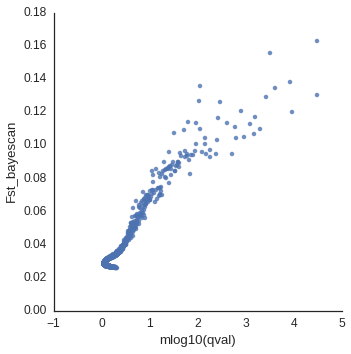

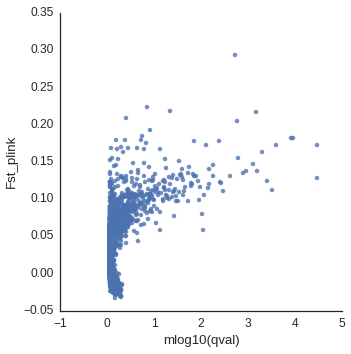

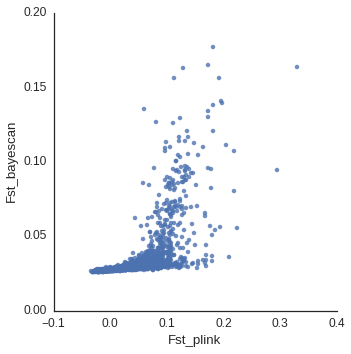

In [77]:
sns.lmplot(data = map_pop_bayescan, y = 'Fst_bayescan', x = 'mlog10(qval)', fit_reg=False)
sns.lmplot(data = map_pop_bayescan, y = 'Fst_plink', x = 'mlog10(qval)', fit_reg=False)
sns.lmplot(data = map_pop_bayescan, x = 'Fst_plink', y = 'Fst_bayescan', fit_reg=False)
plt.show()

### Manhattan plots

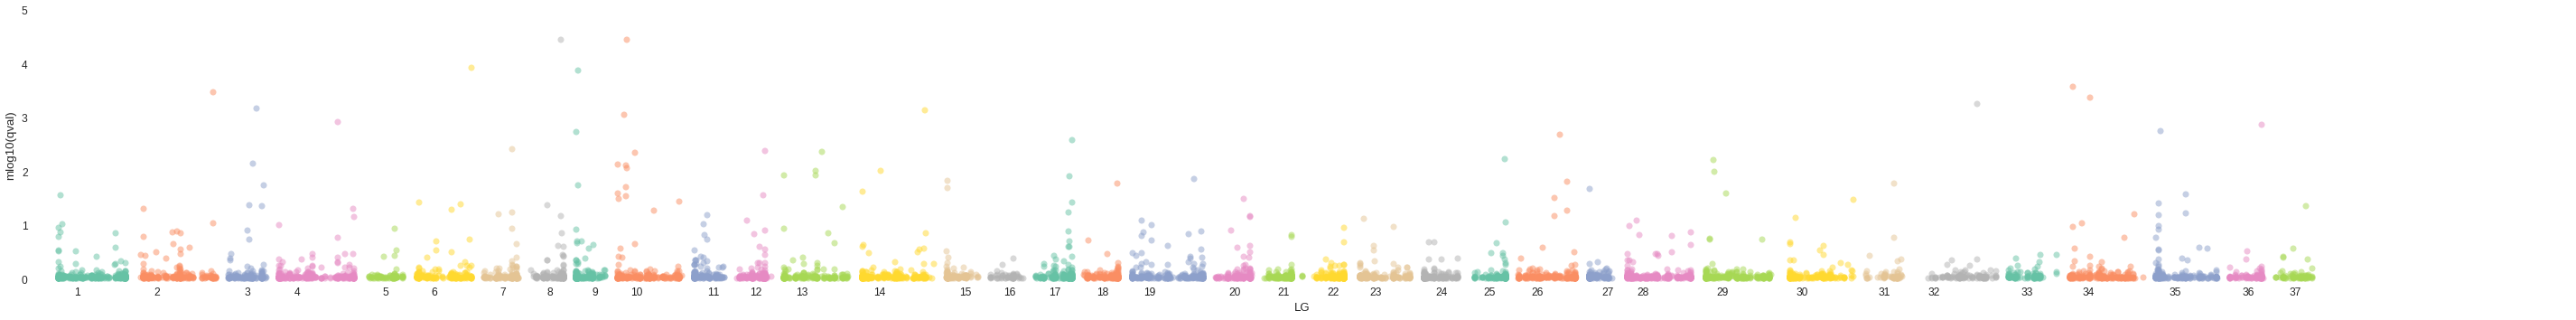

In [25]:
g = sns.lmplot(data = cM_positions, x = 'overall_cM', y = 'mlog10(qval)', fit_reg=False, hue = 'paper1_LG', sharex=False,
           legend= False, size = 5, aspect = 8, truncate = True, scatter_kws={'s':50, 'alpha':.5},          palette="Set2")
g.set(xlim=-40, ylim=0)
g.set(xticks=cumpos['cM']+30, xticklabels = np.arange(1, 38))
g.set_axis_labels('LG')
sns.despine(left=True, bottom = True)

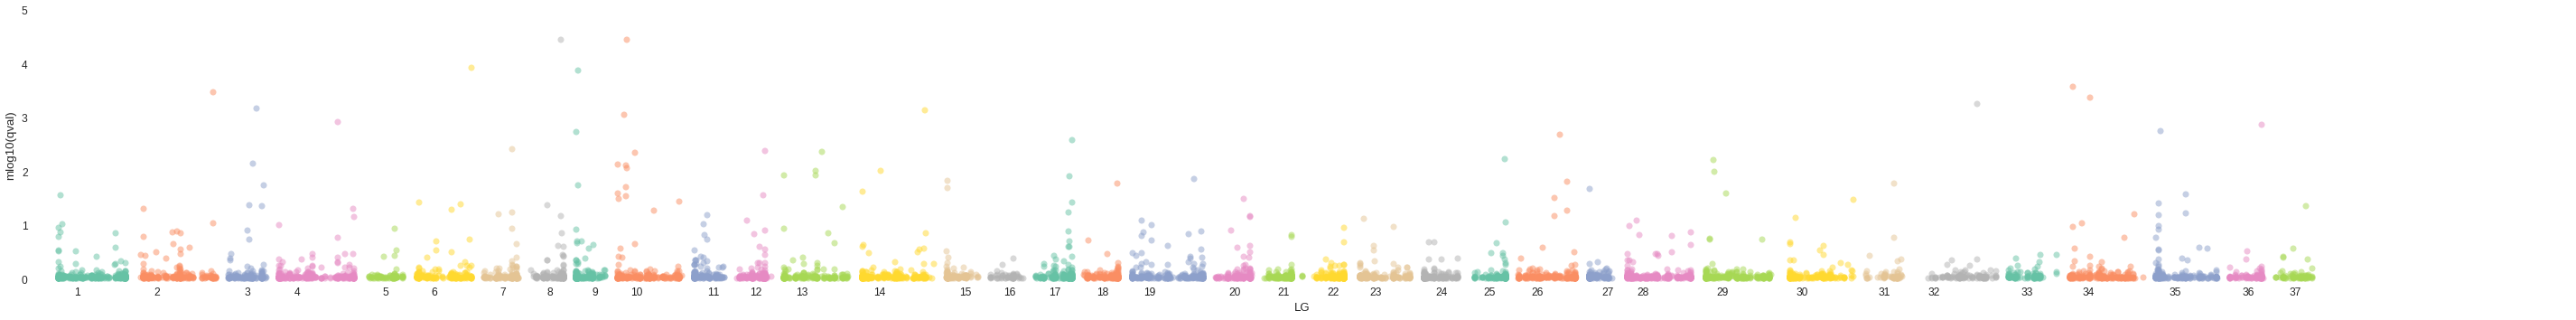

In [26]:
g = sns.lmplot(data = cM_positions, x = 'overall_cM', y = 'mlog10(qval)', fit_reg=False, hue = 'paper1_LG', sharex=False,
           legend= False, size = 5, aspect = 8, truncate = True, scatter_kws={'s':50, 'alpha':.5},          palette="Set2")
g.set(xlim=-40, ylim=0)
g.set(xticks=cumpos['cM']+30, xticklabels = np.arange(1, 38))
g.set_axis_labels('LG')
sns.despine(left=True, bottom = True)

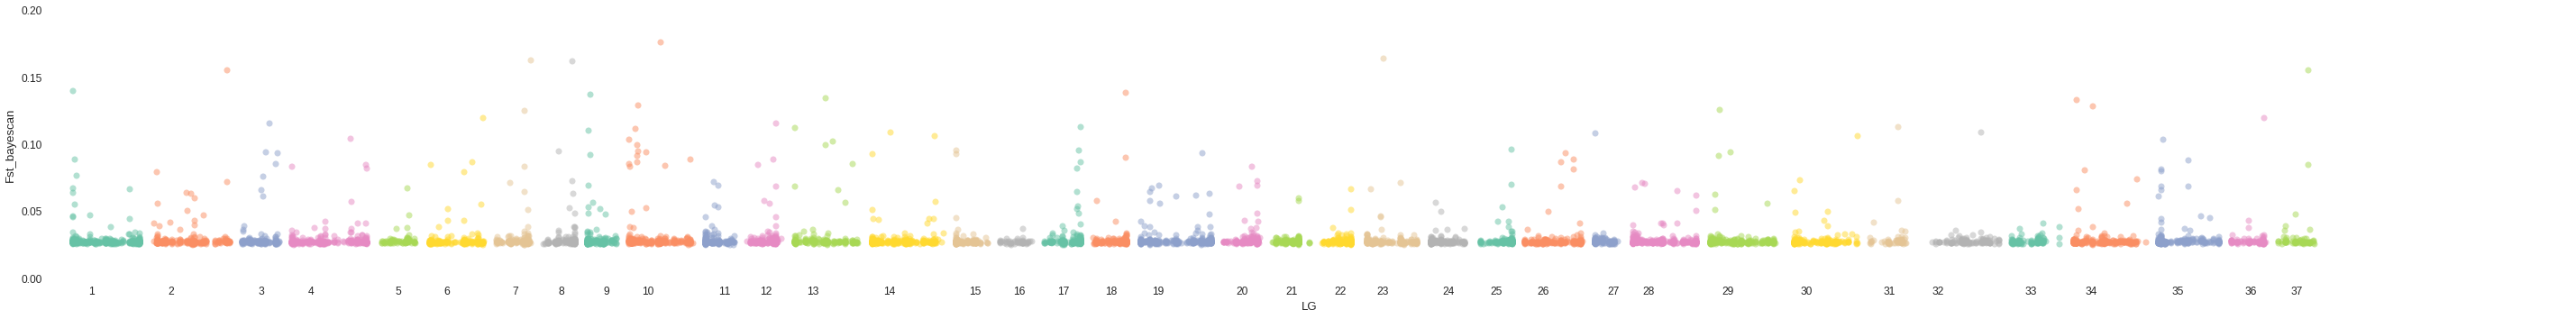

In [27]:
g = sns.lmplot(data = cM_positions, x = 'overall_cM', y = 'Fst_bayescan', fit_reg=False, hue = 'paper1_LG', sharex=False,
           legend= False, size = 5, aspect = 8, truncate = True, scatter_kws={'s':50, 'alpha':.5},          palette="Set2")
g.set(xlim=-40, ylim=0)
g.set(xticks=cumpos['cM']+30, xticklabels = np.arange(1, 38))
g.set_axis_labels('LG')
sns.despine(left=True, bottom = True)

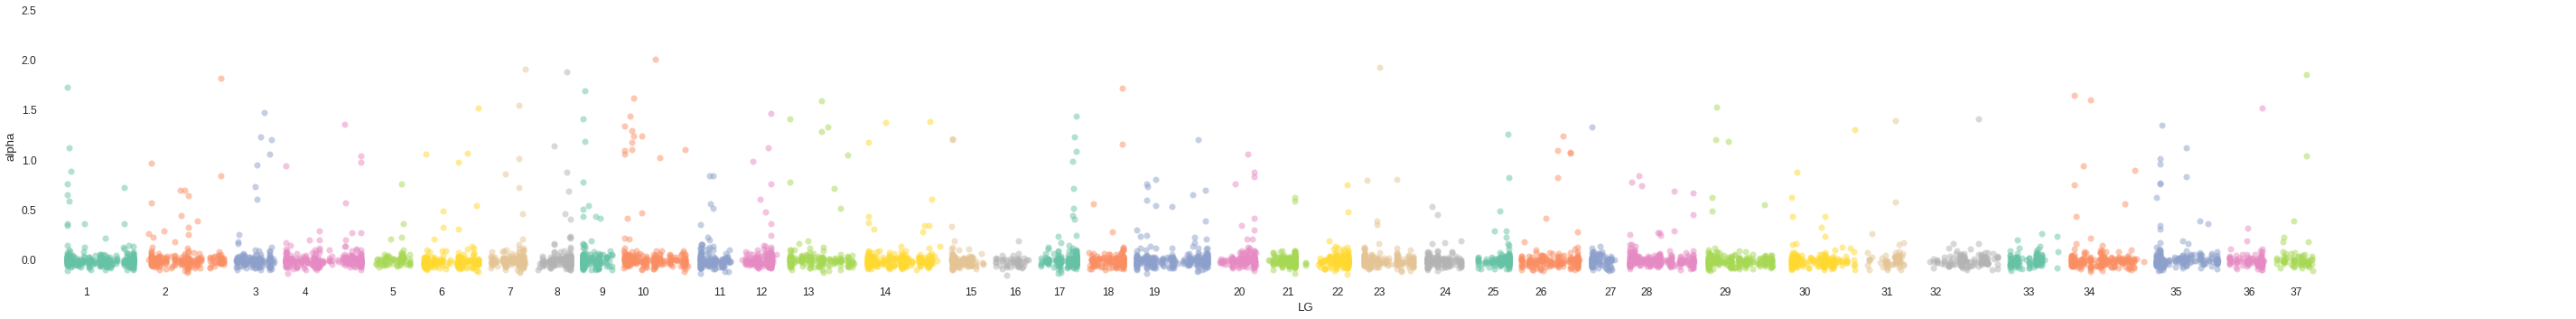

In [28]:
g = sns.lmplot(data = cM_positions, x = 'overall_cM', y = 'alpha', fit_reg=False, hue = 'paper1_LG', sharex=False,
           legend= False, size = 5, aspect = 8, truncate = True, scatter_kws={'s':50, 'alpha':.5},          palette="Set2")
g.set(xlim=-40, ylim=-.2)
g.set(xticks=cumpos['cM']+30, xticklabels = np.arange(1, 38))
g.set_axis_labels('LG')
sns.despine(left=True, bottom = True)

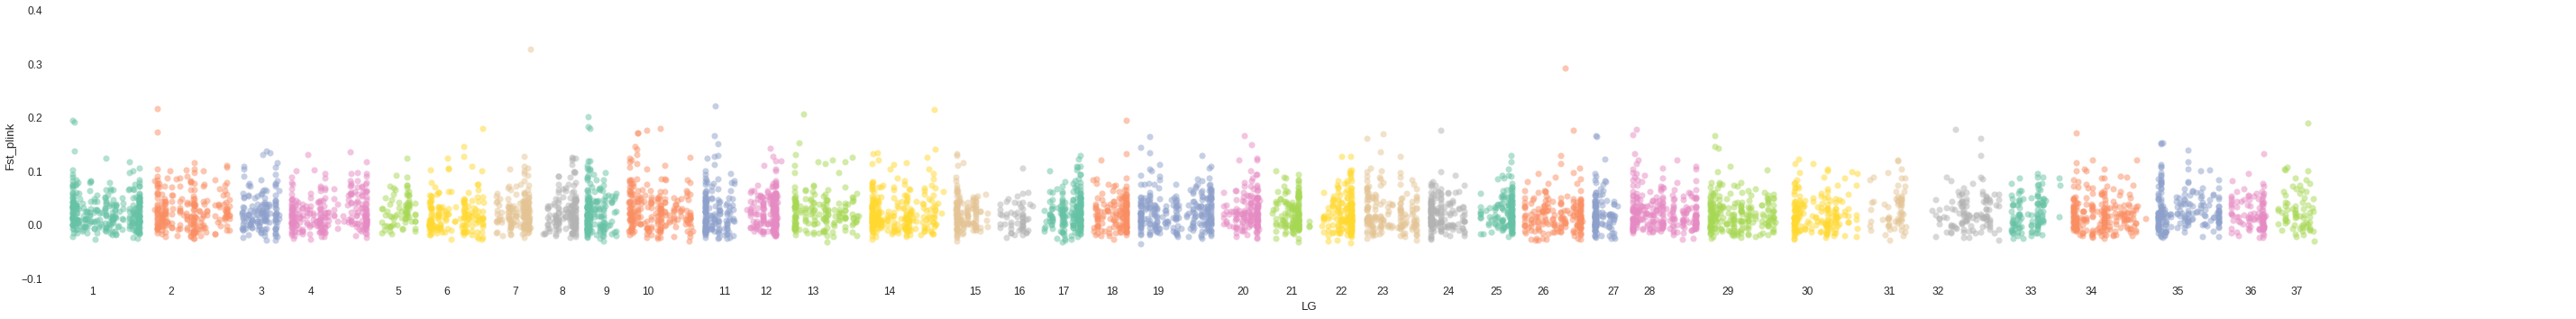

In [29]:
g = sns.lmplot(data = cM_positions, x = 'overall_cM', y = 'Fst_plink', fit_reg=False, hue = 'paper1_LG', sharex=False,
           legend= False, size = 5, aspect = 8, truncate = True, scatter_kws={'s':50, 'alpha':.5},          palette="Set2")
g.set(xlim=-40, ylim=-.1)
g.set(xticks=cumpos['cM']+30, xticklabels = np.arange(1, 38))
g.set_axis_labels('LG')
sns.despine(left=True, bottom = True)
plt.show()
#plt.plot(cMs, rolling_stat)

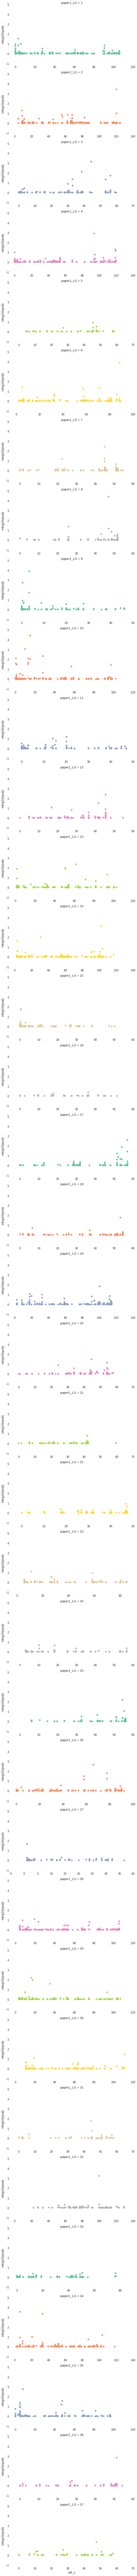

In [30]:
g = sns.lmplot(data = cM_positions, x = 'cM_x', y = 'mlog10(qval)', fit_reg=False, lowess=False, row = 'paper1_LG', hue = 'paper1_LG',
               sharex=False, legend= False, size = 4, aspect = 2, truncate = True,  scatter_kws={'s':50, 'alpha':1},  palette="Set2")
g.set(xlim=-5)
sns.despine(left=True, bottom = True)

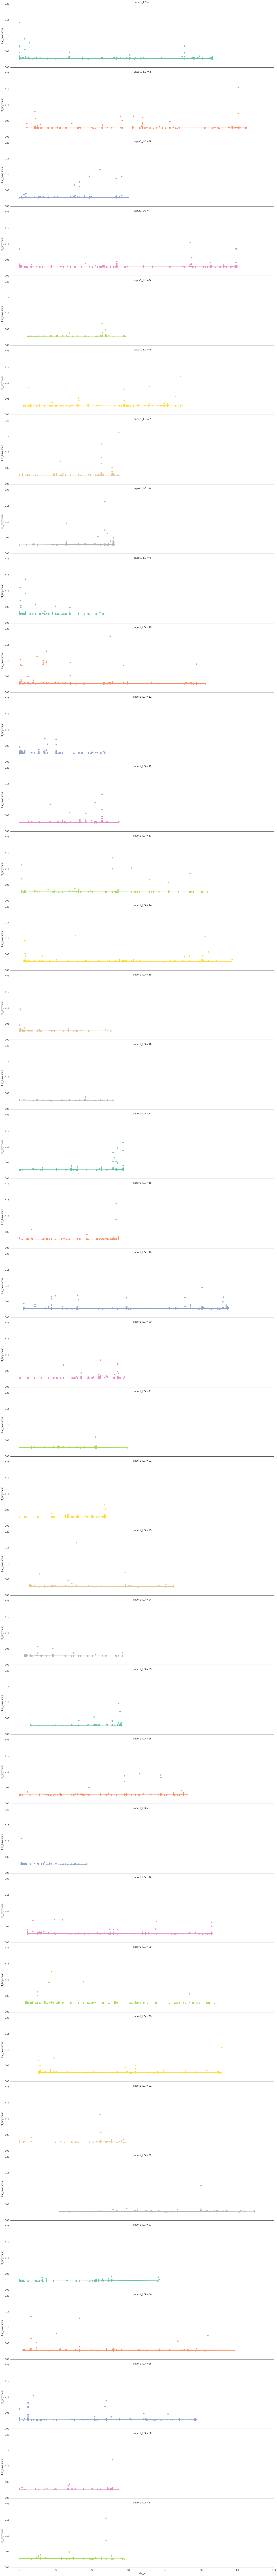

In [31]:
g = sns.lmplot(data = cM_positions, x = 'cM_x', y = 'Fst_bayescan', fit_reg=True, lowess=True, row = 'paper1_LG', hue = 'paper1_LG',
               sharex=True, legend= False, size = 5, aspect = 4, truncate = True,  scatter_kws={'s':50, 'alpha':1},  palette="Set2")
g.set(xlim=-5)
sns.despine(left=True)

## cM-window moving average

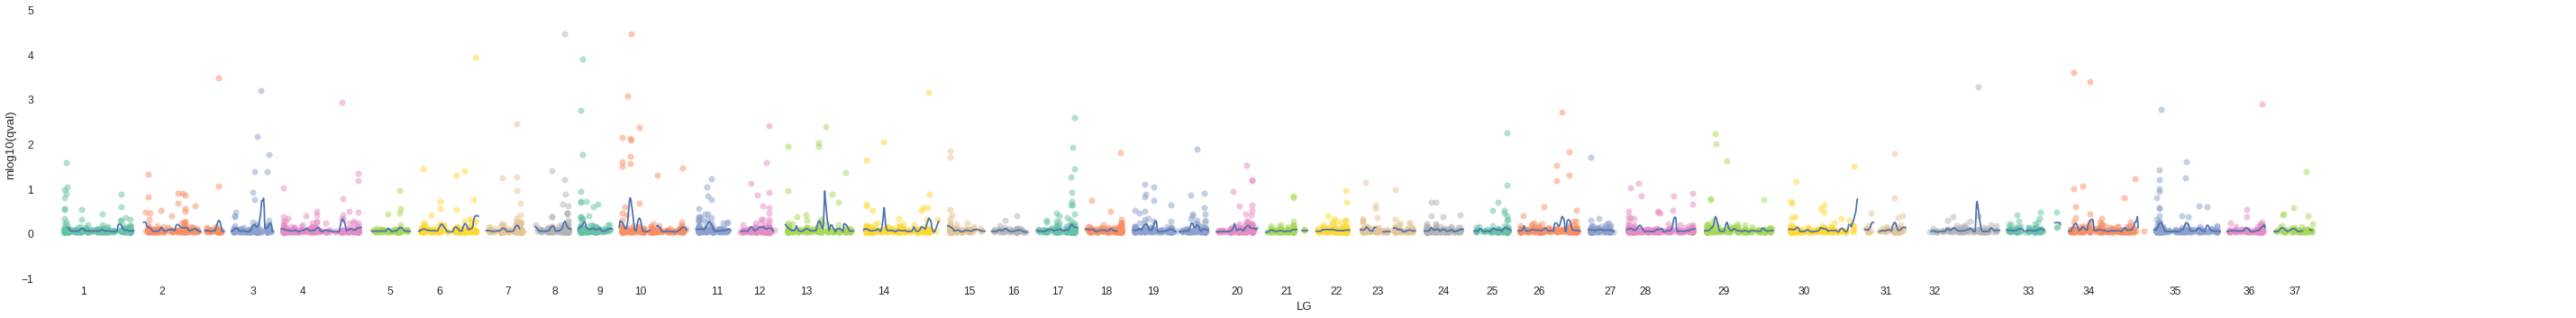

In [32]:
max_cM = max(cM_positions['overall_cM'])
cMs = np.arange(0, max_cM, 1.)

stat = 'mlog10(qval)'
window_size = 5
minsize = 2

rolling_stat = []
for xx in cMs:
    subset = cM_positions[cM_positions['overall_cM'] >= xx - window_size ]
    subset = subset[subset['overall_cM'] <= xx + window_size]
    if len(subset) < minsize:
        val = np.NaN
    else:
        val = np.average(subset[stat], weights = .001+window_size-(np.abs(xx - subset['overall_cM'])))
    rolling_stat.append(val)

g = sns.lmplot(data = cM_positions, x = 'overall_cM', y = stat, fit_reg=False, hue = 'paper1_LG', sharex=False,
           legend= False, size = 5, aspect = 8, truncate = True, scatter_kws={'s':50, 'alpha':.5},          palette="Set2")
g.set(xlim=-40)
g.set(xticks=cumpos['cM']+30, xticklabels = np.arange(1, 38))
g.set_axis_labels('LG')
sns.despine(left=True, bottom = True)
plt.plot(cMs, rolling_stat)
plt.savefig(os.path.join('paper', 'figures', 'supplemental', 'qval.png'))
plt.show()

    



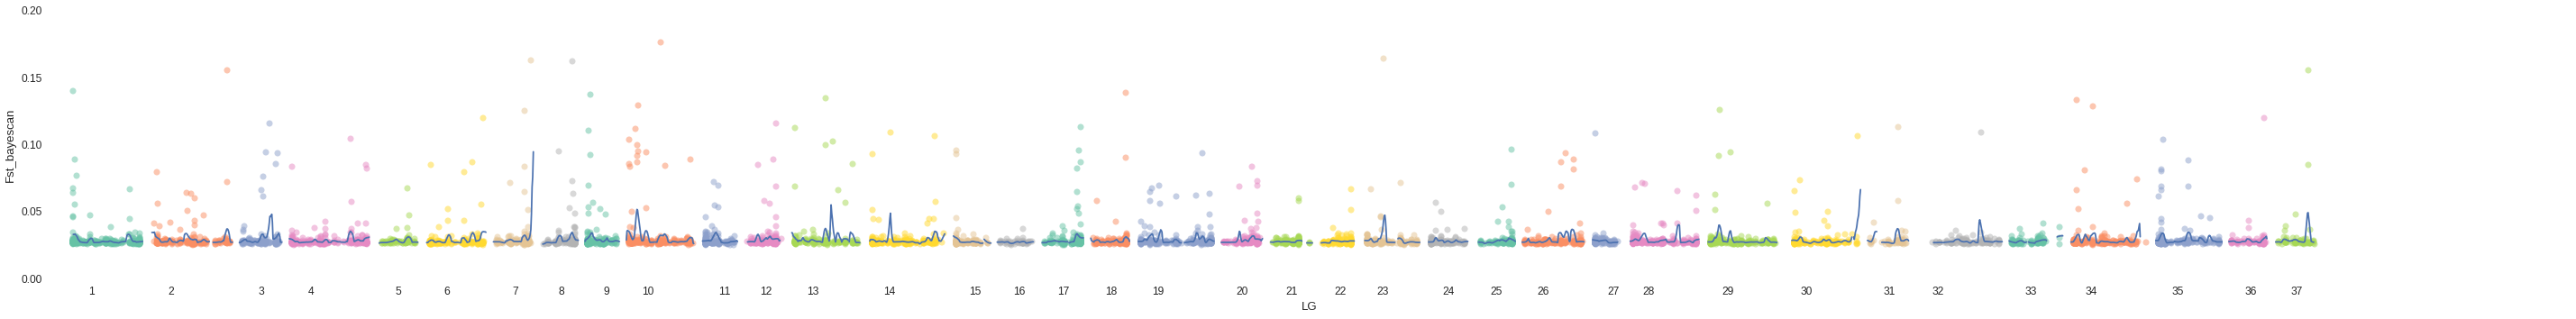

In [33]:
max_cM = max(cM_positions['overall_cM'])
cMs = np.arange(0, max_cM, 1.)

stat = 'Fst_bayescan'
window_size = 5
minsize = 2

rolling_stat = []
for xx in cMs:
    subset = cM_positions[cM_positions['overall_cM'] >= xx - window_size ]
    subset = subset[subset['overall_cM'] <= xx + window_size]
    if len(subset) < minsize:
        val = np.NaN
    else:
        val = np.average(subset[stat], weights = .001+window_size-(np.abs(xx - subset['overall_cM'])))
    rolling_stat.append(val)

g = sns.lmplot(data = cM_positions, x = 'overall_cM', y = stat, fit_reg=False, hue = 'paper1_LG', sharex=False,
           legend= False, size = 5, aspect = 8, truncate = True, scatter_kws={'s':50, 'alpha':.5},          palette="Set2")
g.set(xlim=-40)
g.set(xticks=cumpos['cM']+30, xticklabels = np.arange(1, 38))
g.set_axis_labels('LG')
sns.despine(left=True, bottom = True)
plt.plot(cMs, rolling_stat)
plt.savefig(os.path.join('paper', 'figures', 'supplemental', 'Fst_bayescan.png'))
plt.show()

    



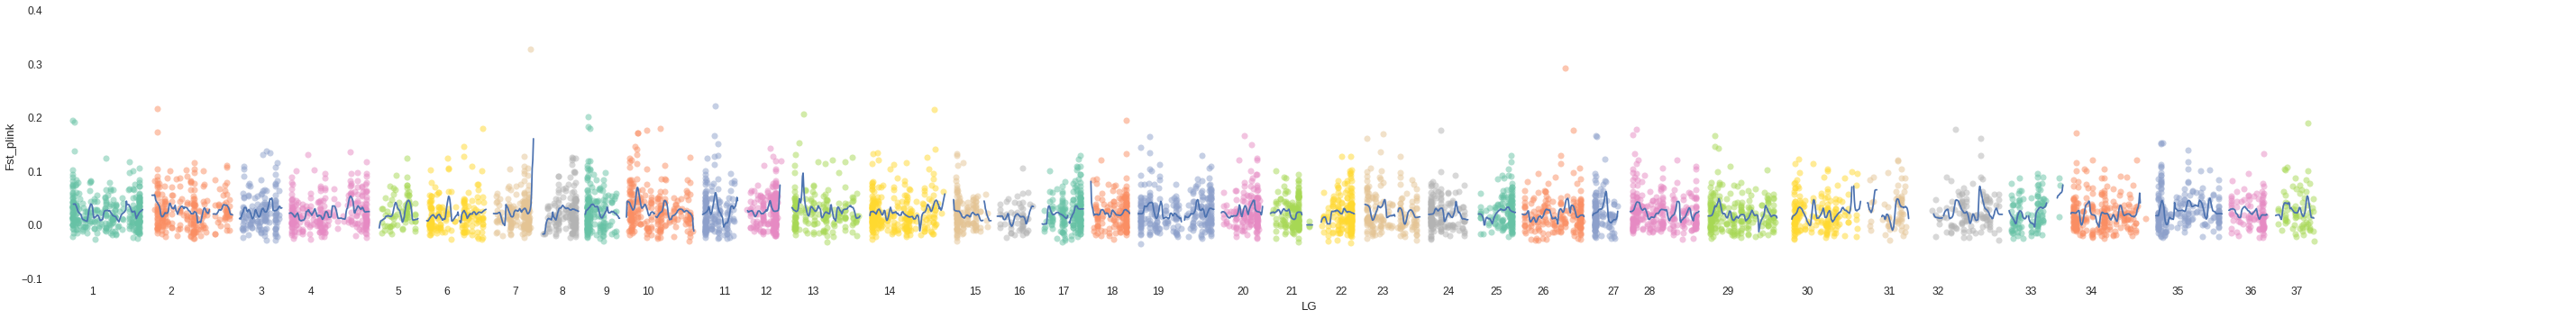

In [34]:
max_cM = max(cM_positions['overall_cM'])
cMs = np.arange(0, max_cM, 1.)

stat = 'Fst_plink'
window_size = 5
minsize = 2

rolling_stat = []
for xx in cMs:
    subset = cM_positions[cM_positions['overall_cM'] >= xx - window_size ]
    subset = subset[subset['overall_cM'] <= xx + window_size]
    if len(subset) < minsize:
        val = np.NaN
    else:
        val = np.average(subset[stat], weights = .001+window_size-(np.abs(xx - subset['overall_cM'])))
    rolling_stat.append(val)

g = sns.lmplot(data = cM_positions, x = 'overall_cM', y = stat, fit_reg=False, hue = 'paper1_LG', sharex=False,
           legend= False, size = 5, aspect = 8, truncate = True, scatter_kws={'s':50, 'alpha':.5},          palette="Set2")
g.set(xlim=-40)
g.set(xticks=cumpos['cM']+30, xticklabels = np.arange(1, 38))
g.set_axis_labels('LG')
sns.despine(left=True, bottom = True)
plt.plot(cMs, rolling_stat)
plt.savefig(os.path.join('paper', 'figures', 'supplemental', 'Fst_plink.png'))
plt.show()

In [169]:
mapped_lfmm = pd.read_csv(os.path.join('results','batch_4','LFMM', 'mapped_lfmm.txt'), sep = '\t')
mapped_lfmm.tail()

contig  resolved_locus  stacks_CatID stacks_SNP_x  LEPname  LEP_LG  \
12394    NaN             NaN           NaN          NaN      NaN     NaN   
12395    NaN             NaN           NaN          NaN      NaN     NaN   
12396    NaN             NaN           NaN          NaN      NaN     NaN   
12397    NaN             NaN           NaN          NaN      NaN     NaN   
12398    NaN             NaN           NaN          NaN      NaN     NaN   

       cM_OLD  paper1_LG  cM  locnum       ...        plinkLG  stacksID  \
12394     NaN        NaN NaN    6144       ...              0  80816_92   
12395     NaN        NaN NaN    6145       ...              0  66831_92   
12396     NaN        NaN NaN    6146       ...              0  67715_92   
12397     NaN        NaN NaN    6147       ...              0  68144_92   
12398     NaN        NaN NaN    6148       ...              0  68589_92   

       junk1 junk2  CHR stacks_SNP_y  POS  NMISS       FST manhattan_order  
12394      0    92    0     80816_92   92    147  0.004566           12395  
12395      0    92    0     66831_92   92    157  0.118510           12396  
12396      0    92    0     67715_92   92    159  0.021152           12397  
12397      0    92    0     68144_92   92    156  0.004437           12398  
12398      0    92    0     68589_92   92    149  0.290419           12399  

[5 rows x 24 columns]

In [167]:
mapped_lfmm.sort('mlog10val', ascending=False)[['stacksID', 'mlog10val', 'paper1_LG', 'contig']]

stacksID  mlog10val  paper1_LG  contig
9155   33643_47  12.391629        NaN     NaN
12175  67169_90   7.340432        NaN     NaN
9271   35771_49   7.245930        NaN     NaN
11856  25483_87   7.071683        NaN     NaN
11460  15801_82   6.731747        NaN     NaN
9265   32011_49   6.559510        NaN     NaN
6342    74225_7   6.491146        NaN     NaN
7061   56829_17   6.098460        NaN     NaN
12027  26617_89   6.044013        NaN     NaN
11267  28558_79   6.029945        NaN     NaN
10498  55331_67   5.880757        NaN     NaN
7606   24462_25   5.633584        NaN     NaN
9976   53510_59   5.541213        NaN     NaN
12289  67791_91   5.535740        NaN     NaN
9177   65952_47   5.467417        NaN     NaN
10830  63618_72   5.457942        NaN     NaN
7934   36613_29   5.424953        NaN     NaN
8097   66805_31   5.396998        NaN     NaN
5938   57165_43   5.335595         35  c77742
8960   60662_44   5.282918        NaN     NaN
6450     9674_9   5.129946        NaN     NaN
11011  41457_75   5.122713        NaN     NaN
10293  34711_64   5.029900        NaN     NaN
11438  59071_81   4.998258        NaN     NaN
7067   68643_17   4.992938        NaN     NaN
8027   63823_30   4.939882        NaN     NaN
11799  43284_86   4.787929        NaN     NaN
12043  36985_89   4.673613        NaN     NaN
9804    9124_57   4.593023        NaN     NaN
7602   21220_25   4.547492        NaN     NaN
...         ...        ...        ...     ...
7886   65811_28   0.000717        NaN     NaN
8237    2264_34   0.000674        NaN     NaN
1990    1209_27   0.000672         11  c11368
9120    2138_47   0.000669        NaN     NaN
11713  48085_85   0.000656        NaN     NaN
11992    403_89   0.000641        NaN     NaN
11945  33360_88   0.000634        NaN     NaN
6359    44645_7   0.000624        NaN     NaN
5648   22211_88   0.000621         33   c3579
8994   26949_45   0.000611        NaN     NaN
243    41795_10   0.000597          1  c58998
6384     7396_8   0.000587        NaN     NaN
10832  65605_72   0.000551        NaN     NaN
7357    1551_22   0.000453        NaN     NaN
2236   57785_33   0.000444         12  c78507
5944   38497_79   0.000437         35  c55122
10754  41753_71   0.000299        NaN     NaN
9893   26686_58   0.000289        NaN     NaN
2562   53088_64   0.000288         14  c72714
2546   32064_78   0.000242         14  c47537
2339   52687_73   0.000232         13  c72227
12285  65790_91   0.000170        NaN     NaN
6470    38421_9   0.000159        NaN     NaN
5570   33886_61   0.000159         33  c49666
3929    4276_63   0.000126         22  c14845
5110   55496_42   0.000115         29   c7567
4488   40997_34   0.000050         26  c58078
9854   58952_57   0.000016        NaN     NaN
10959  46457_74   0.000007        NaN     NaN
10483  42119_67   0.000001        NaN     NaN

[12399 rows x 4 columns]

In [36]:
cM_positions.head()

contig resolved_locus  stacks_CatID stacks_SNP  LEPname  LEP_LG  cM_OLD  \
0   c4311           4311         28282   28282_88     4584       1       0   
1  c56875          56875         39970   39970_60     7377       1       0   
2  c54045          54045         37579   37579_17     6722       1       0   
3   c2167           2167         10293    10293_9     1923       1       0   
4  c69918          69918         50820    50820_7    10017       1       0   

   paper1_LG  cM_x  BSname     ...         alpha  CHR       SNP  POS  NMISS  \
0          1     0    6440     ...     -0.008090    1  28282_88   88    156   
1          1     0    6348     ...     -0.019498    1  39970_60   60    152   
2          1     0    6197     ...      0.004748    1  37579_17   17    164   
3          1     0    6162     ...     -0.016256    1   10293_9    9    162   
4          1     0    6154     ...     -0.019918    1   50820_7    7    169   

  Fst_plink  manhattan_order  mlog10(qval)  cM_y  overall_cM  
0  0.013742                1      0.057833     0           0  
1  0.016345                2      0.053233     0           0  
2  0.028103                3      0.053150     0           0  
3  0.014312                4      0.058608     0           0  
4  0.015249                5      0.052753     0           0  

[5 rows x 23 columns]

## add LFMM results

In [37]:
cM_positions2 = pd.merge(cM_positions, mapped_lfmm, left_on=['BSname', 'paper1_LG'], right_on = ['locnum', 'paper1_LG'])

## rolling window average statistics
at each cM, roll_along() takes a weighted average statistic for all loci within window_size/2 on either side

In [38]:
def roll_along(data, stat, positions, window_size = 5.0, minsize= 2):
    rolling_stat = []
    rolling_size = []
    for xx in positions:
        subset = data[data['overall_cM'] >= xx - window_size/2. ]
        subset = subset[subset['overall_cM'] <= xx + window_size/2.]
        if len(subset) < minsize:
            val = np.NaN
        else:
            val = np.average(subset[stat], weights = .001+window_size-(np.abs(xx - subset['overall_cM'])))
        rolling_stat.append(val)
        rolling_size.append(len(subset))
    to_return = pd.DataFrame({stat+'_roll':rolling_stat, 'n':rolling_size, 'pos':positions})
    to_return = to_return[['pos', 'n', stat+'_roll']]
    return(to_return)

In [53]:
def get_weights(window_size, center, positions):
    wei = .001+window_size-(np.abs(xx - subset['overall_cM']))
    return(wei)
    

### rolling_boostrap() walks over the data and calculates a bootstrapped upper 95% interval at each cM position
incorporates the locus positions and weighting schemes.

not sure that to do with 'inf' values

In [42]:
def rolling_boostrap(data, stat, positions, window_size = 5.0, minsize= 2, reps = 500):
    rolling_upper95 = []
    rolling_size = []
    for xx in positions:
        subset = data[data['overall_cM'] >= xx - window_size/2.]
        subset = subset[subset['overall_cM'] <= xx + window_size/2.]
        if len(subset) < minsize:
            val = np.NaN
        else:
            val = np.percentile([np.average(np.random.choice(data[stat], size = len(subset), replace = True), 
                            weights = .001+window_size-(np.abs(xx - subset['overall_cM'])))
             for xx in range(reps)], 95)
            
        rolling_upper95.append(val)
        rolling_size.append(len(subset))
    to_return = pd.DataFrame({stat+'_bootstrap95':rolling_upper95, 'n':rolling_size, 'pos':positions})
    to_return = to_return[['pos', 'n', stat+'_bootstrap95']]
    return(to_return)

In [493]:
max_cM = max(cM_positions2['overall_cM'])
cMs = np.arange(1, max_cM+1, 1.)

# doesn't drop 'inf' values

In [55]:
cM_positions2['mlog10(qval)'].dropna()

0       0.057833
1       0.053233
2       0.053150
3       0.058608
4       0.052753
5       0.355502
6       0.065264
7       0.553339
8       0.051289
9            inf
10      0.117447
11      0.097736
12      0.079053
13      0.571800
14      0.068858
15      0.061866
16      0.056570
17      0.819329
18      0.058195
19      0.054531
20      0.052527
21      0.061575
22      0.053592
23      0.992508
24      0.052890
25      0.056347
26      0.058822
27      0.056827
28      0.072424
29      0.056570
          ...   
6221    0.071026
6222    0.089824
6223    0.070423
6224    0.053440
6225    0.071440
6226    0.069056
6227    0.159292
6228    0.054054
6229    0.092659
6230    0.062236
6231    0.096785
6232    0.081215
6233    0.054054
6234    0.055004
6235    0.050551
6236    1.385145
6237         inf
6238    0.101445
6239    0.053956
6240    0.098106
6241    0.405199
6242    0.056347
6243    0.085308
6244    0.057833
6245    0.114051
6246    0.056219
6247    0.081854
6248    0.0543

#### Rolling averages

In [50]:
rolling = roll_along(data = cM_positions2, stat = 'mlog10val', positions = cMs)
rolling = pd.merge(rolling, roll_along(data = cM_positions2, stat = 'mlog10(qval)', positions = cMs)  )
rolling = pd.merge(rolling, roll_along(data = cM_positions2, stat = 'Fst_bayescan', positions = cMs))
rolling = pd.merge(rolling, roll_along(data = cM_positions2, stat = 'Fst_plink', positions = cMs))
rolling = pd.merge(rolling, roll_along(data = cM_positions2, stat = 'alpha', positions = cMs))

#### Rolling bootstrap 95% upper bounds

In [51]:
rolling = pd.merge(rolling, rolling_boostrap(data = cM_positions2, stat = 'mlog10val', positions = cMs)  )
rolling = pd.merge(rolling, rolling_boostrap(data = cM_positions2, stat = 'mlog10(qval)', positions = cMs)  )
rolling = pd.merge(rolling, rolling_boostrap(data = cM_positions2, stat = 'Fst_bayescan', positions = cMs))
rolling = pd.merge(rolling, rolling_boostrap(data = cM_positions2, stat = 'Fst_plink', positions = cMs))
rolling = pd.merge(rolling, rolling_boostrap(data = cM_positions2, stat = 'alpha', positions = cMs))

In [56]:
rolling.head()

pos   n  mlog10val_roll  mlog10(qval)_roll  Fst_bayescan_roll  \
0    0  48        0.543031                inf           0.033677   
1    1  56        0.562279                inf           0.034190   
2    2  57        0.569932                inf           0.034391   
3    3  25        0.597486           0.208128           0.033741   
4    4  22        0.539611           0.228332           0.034919   

   Fst_plink_roll  alpha_roll  mlog10val_bootstrap95  \
0        0.040274    0.081990               0.595699   
1        0.041885    0.093325               0.586289   
2        0.042190    0.097934               0.593776   
3        0.044016    0.095273               0.653391   
4        0.045514    0.116143               0.669155   

   mlog10(qval)_bootstrap95  Fst_bayescan_bootstrap95  Fst_plink_bootstrap95  \
0                  0.263447                  0.032867               0.035081   
1                       inf                  0.032685               0.035258   
2                  0.256895                  0.032644               0.036259   
3                  0.271321                  0.033743               0.038526   
4                  0.261721                  0.034509               0.041354   

   alpha_bootstrap95  
0           0.074861  
1           0.061256  
2           0.066465  
3           0.091657  
4           0.088965

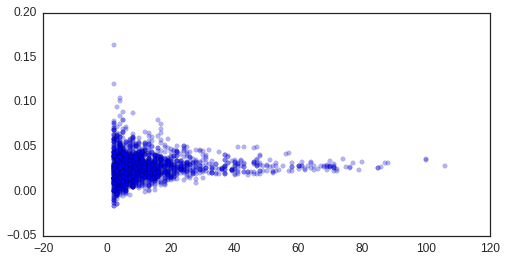

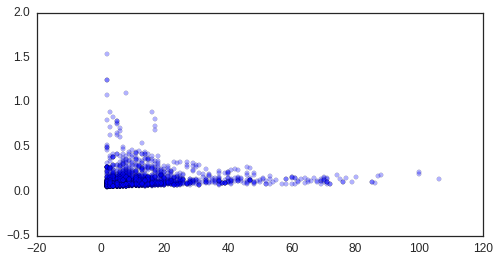

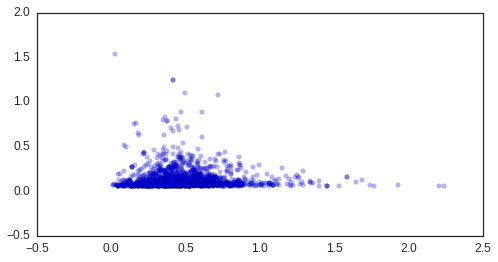

In [58]:
plt.scatter(rolling['n'], rolling['Fst_plink_roll'], alpha = .3)
plt.show()
plt.scatter(rolling['n'], rolling['mlog10(qval)_roll'], alpha = .3)
plt.show()
plt.scatter(rolling['mlog10val_roll'], rolling['mlog10(qval)_roll'], alpha = .3)

In [59]:
to_plot = pd.melt(rolling, id_vars='pos')
to_plot.head()

pos variable  value
0    0        n     48
1    1        n     56
2    2        n     57
3    3        n     25
4    4        n     22

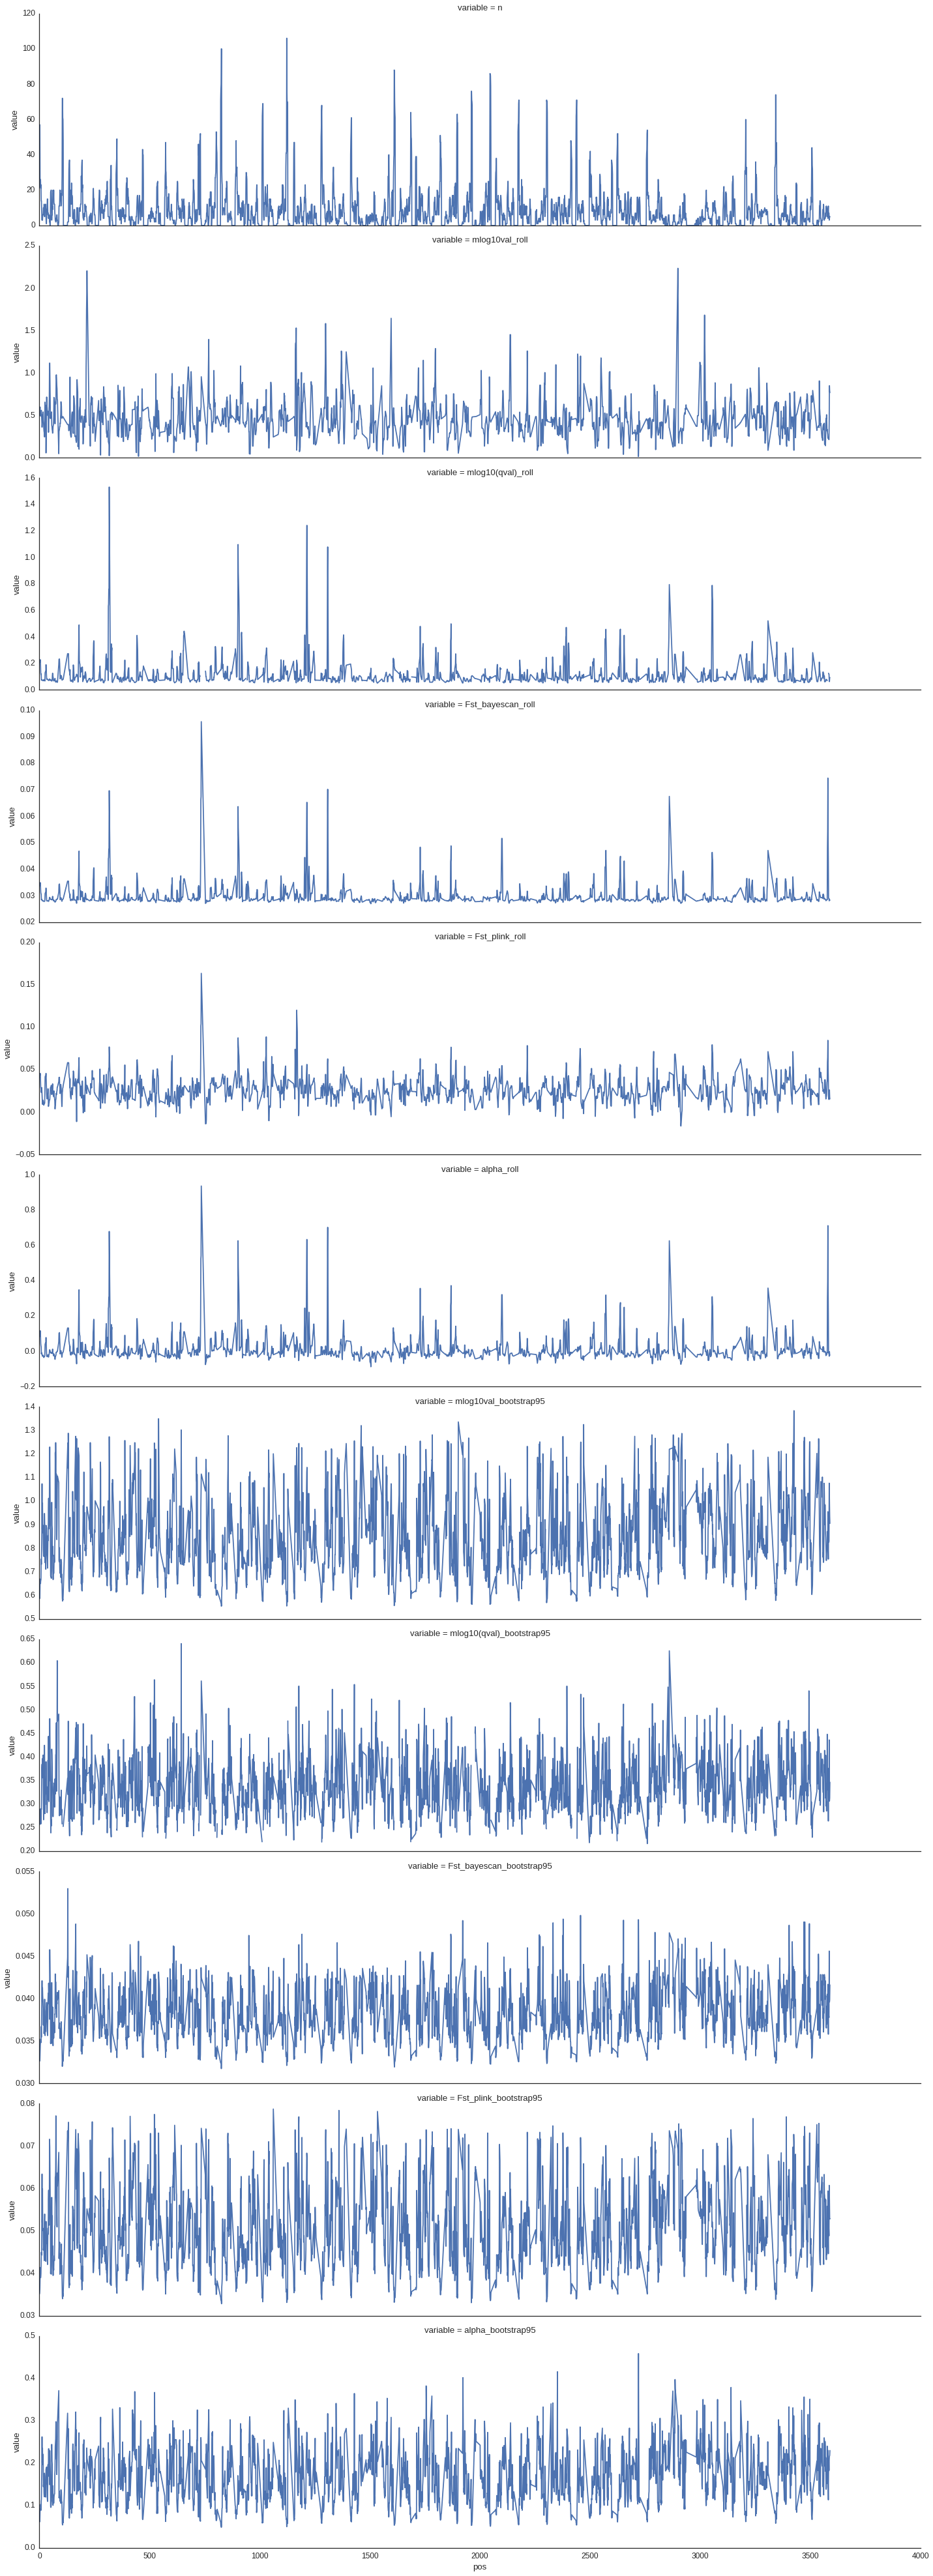

In [60]:
g = sns.FacetGrid(data = to_plot, row = 'variable', size = 5, aspect = 4,  sharey=False)
g.map(plt.plot, 'pos', 'value')

#### Bootstrap 95% intervals for mean values

#### Does not take the distance and weighting scheme into account

produces a dict of nloci: upper 95% value

In [501]:
def bootstrap_means(series, size, reps = 5000):
    means = [np.random.choice(series, size = size, replace = True).mean() for _ in range(reps)]
    return(means)

In [1]:
def bootstrap_upper(series, maxsize = 120, percentile = 95, plot = False):
    bs_upper_dict = dict()
    for xx in range(1, maxsize+1):
        bb = bootstrap_means(series, size = xx)
        upper = np.percentile(bb, percentile)
        bs_upper_dict[xx] = upper
        if plot:
            plt.hist(bb, bins = 100)
            plt.title('{}  :   {}'.format(xx, upper))
            plt.xlim(0)
            plt.show()
    bs_upper_dict[0] = np.NaN
    return(bs_upper_dict)

In [ ]:
# def weighted_bootstrap(series, )

In [516]:
upper_mlog10val = bootstrap_upper(cM_positions2['mlog10val'])
upper_Fst_bayescan = bootstrap_upper(cM_positions2['Fst_bayescan'])
upper_Fst_plink = bootstrap_upper(cM_positions2['Fst_plink'])
upper_alpha = bootstrap_upper(cM_positions2['alpha'])
upper_mlog10qval = bootstrap_upper(cM_positions2['mlog10(qval)'])

In [513]:
rolling.columns.tolist()[2:]

['mlog10val_roll',
 'mlog10(qval)_roll',
 'Fst_bayescan_roll',
 'Fst_plink_roll',
 'alpha_roll']

In [526]:
rolling['upper95_mlog10val_roll' ] = [vals['mlog10val_roll'] >      upper_mlog10val[vals['n']]  for idx, vals in rolling.iterrows()]
rolling['upper95_mlog10qval_roll' ] = [vals['mlog10(qval)_roll'] >  upper_mlog10qval[vals['n']]  for idx, vals in rolling.iterrows()]
rolling['upper95_Fst_bayescan_roll'] = [vals['Fst_bayescan_roll'] > upper_Fst_bayescan[vals['n']]  for idx, vals in rolling.iterrows()]
rolling['upper95_Fst_plink_roll'] = [vals['Fst_plink_roll'] >       upper_Fst_plink[vals['n']]  for idx, vals in rolling.iterrows()]
rolling['upper95_Fst_alpha'] = [vals['alpha_roll'] >                upper_alpha[vals['n']]  for idx, vals in rolling.iterrows()]

In [536]:
rolling.tail()

pos   n  mlog10val_roll  mlog10(qval)_roll  Fst_bayescan_roll  \
3585  3586  12        0.448382           0.109907           0.028697   
3586  3587  12        0.486614           0.107884           0.028640   
3587  3588   9        0.575805           0.088457           0.028063   
3588  3589   5        0.767061           0.094958           0.028254   
3589  3590   5        0.756919           0.099638           0.028194   

      Fst_plink_roll  alpha_roll upper95_mlog10val_roll  \
3585        0.015819   -0.014958                  False   
3586        0.015742   -0.015975                  False   
3587        0.012365   -0.028919                  False   
3588        0.015130   -0.022787                  False   
3589        0.013609   -0.025775                  False   

     upper95_mlog10qval_roll upper95_Fst_bayescan_roll upper95_Fst_plink_roll  \
3585                   False                     False                  False   
3586                   False                     False                  False   
3587                   False                     False                  False   
3588                   False                     False                  False   
3589                   False                     False                  False   

     upper95_Fst_alpha  
3585             False  
3586             False  
3587             False  
3588             False  
3589             False

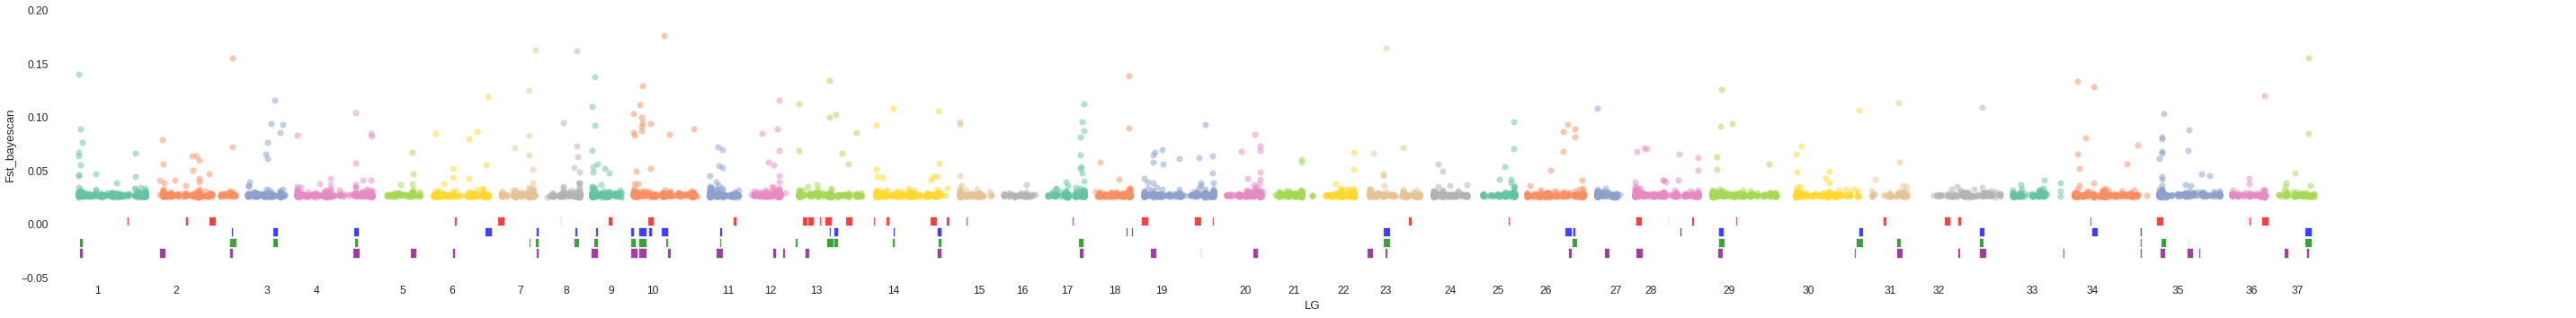

In [554]:
stat = 'Fst_bayescan'

g = sns.lmplot(data = cM_positions2, x = 'overall_cM', y = stat,  fit_reg=False, sharex=False,
           legend= False, size = 5, aspect = 8, truncate = True, scatter_kws={'s':50, 'alpha':.5}, palette="Set2", 
              hue = 'paper1_LG',
              )
g.set(xlim=-40, ylim = -.05)
g.set(xticks=cumpos['cM']+30, xticklabels = np.arange(1, 38))
g.set_axis_labels('LG')
sns.despine(left=True, bottom = True)

# add rolling stats
#plt.plot(cMs, rolling_stat)

min_plotted = min(cM_positions2[stat])


# bootstrap regions
for idx, vals in rolling.iterrows():
    if vals['upper95_mlog10val_roll']:
        currentAxis = plt.gca()
        currentAxis.add_patch(matplotlib.patches.Rectangle((vals['pos'], 0),  1, .008, alpha = .6, color = 'red', label = 'LFMM'))

for idx, vals in rolling.iterrows():
    if vals['upper95_mlog10qval_roll']:
        currentAxis = plt.gca()
        currentAxis.add_patch(matplotlib.patches.Rectangle((vals['pos'], -0.01),  1, .008, alpha = .6, color = 'blue', label = 'Bayescan'))
        
for idx, vals in rolling.iterrows():
    if vals['upper95_Fst_bayescan_roll']:
        currentAxis = plt.gca()
        currentAxis.add_patch(matplotlib.patches.Rectangle((vals['pos'], -0.02),  1, .008, alpha = .6, color = 'green', label = 'Bayescan_Fst'))       

for idx, vals in rolling.iterrows():
    if vals['upper95_Fst_plink_roll']:
        currentAxis = plt.gca()
        currentAxis.add_patch(matplotlib.patches.Rectangle((vals['pos'], -0.03),  1, .008, alpha = .6, color = 'purple', label = 'Weir_Fst'))        


plt.savefig(os.path.join('paper', 'figures', 'supplemental', 'Bayescan_Fst_and_bootstrap.png'))
plt.show()

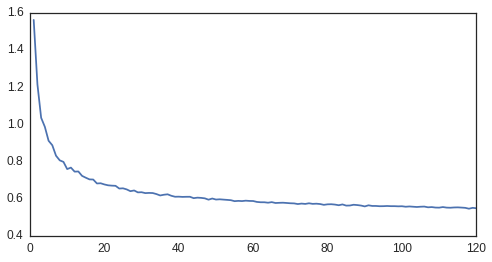

In [362]:
bs_95_dict[0] = np.NaN
plt.plot(bs_95_dict.values())

In [ ]:
map_pop_bayescan[map_pop_bayescan['qval'] < .05]

#### write out

In [271]:
map_pop_bayescan.to_csv(os.path.join(CWD, 'results', 'batch_4', 'pop_analysis', 'map_pop_bayescan.txt'), 
                       sep = "\t", index = False)

In [ ]:
assert False

#### Combine with population allele frequencies

In [ ]:
frq = pd.read_csv(os.path.join(CWD, 'data', 'batch_4', 'pop_genotypes', 'non_paralogs.frq.strat'), 
                  header = None, skipinitialspace = True, sep = " ", skiprows = 1)
frq.columns = [ 'CHR', 'stacks_SNP', 'CLUSTER', 'A1', 'A2', 'MAF', 'MAC', 'NCHROBS', 'junk']
POPINFO = pd.read_csv(os.path.join(CWD, 'data', 'POPINFO.txt'), sep = '\t')
frq = pd.merge(frq, POPINFO)
frq.head()

#### Apply qval threshold

In [ ]:
qval_threshold = .05
outliers = map_pop_bayescan[map_pop_bayescan['qval']  < qval_threshold]
pop_outliers = pd.merge(outliers, frq, on = 'stacks_SNP') # one line for each locus within each pop
pop_outliers.sort(columns = ['LEP_LG', 'cM'], inplace= True)
pop_outliers.head()

#### Convert to a rectangle

In [ ]:
pop_outliers_rect = pop_outliers.pivot('stacks_SNP', 'POPNAME', 'MAF')

# just a subset of the data
pop_outliers_LG2 = pop_outliers[pop_outliers['LEP_LG']==2]
pop_outliers_LG2 = pop_outliers_LG2[pop_outliers_LG2['cM']>100]
pop_outliers_LG2_rect= pop_outliers_LG2.pivot('stacks_SNP', 'POPNAME', 'MAF')

### set up coloration for run timing

In [ ]:
timing_colors = {
    'Hamma Hamma': sns.xkcd_palette(["red"])[0], #summer
    'Sherwood River Summer': sns.xkcd_palette(["red"])[0], #summer
    'Hoodsport Hatchery': sns.xkcd_palette(["brown"])[0],
    'Lilliwaup Creek': sns.xkcd_palette(["brown"])[0],
    'Snohomish River': sns.xkcd_palette(["brown"])[0],
    'Stillaguamish River': sns.xkcd_palette(["brown"])[0],
    'Sherwood River Fall': sns.xkcd_palette(["brown"])[0],
    'Skookum Creek': sns.xkcd_palette(["brown"])[0],
    'Nisqually Kalama Creek': sns.xkcd_palette(["blue"])[0], # winter
    'Squakum Creek': sns.xkcd_palette(["black"])[0]
}
col_colors = pd.Series(pop_outliers_rect.columns).map(timing_colors)

## UPGMA tree

In [ ]:
sns.clustermap(pop_outliers_rect, col_colors=col_colors, standard_scale=0, row_cluster=False)
sns.clustermap(pop_outliers_rect, col_colors=col_colors, standard_scale=0, row_cluster=True)

plt.show()

In [ ]:
sns.clustermap(pop_outliers_rect, col_colors=col_colors, z_score=0)
plt.show()

In [ ]:
figsize(12,12)
sns.heatmap(pop_outliers_LG2_rect, annot=True)
plt.show()

In [ ]:
# standard_scale=0 standarizes by column
# z_score=1 standarizes by column
sns.clustermap(pop_outliers_LG2_rect, z_score=0, row_cluster=False, col_colors=col_colors)
plt.show()